In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import random

(600, 600, 3)


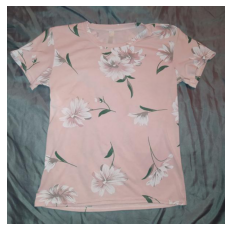

In [2]:
path_to_jpg_file = "/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16f1fbdf-d339-40f6-aecb-e55199db7a96.jpg"
img = mpimg.imread(path_to_jpg_file)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
pixels = img.reshape((-1,3))

print(pixels.shape)

(360000, 3)


In [4]:
pixels[0]

array([56, 50, 52], dtype=uint8)

### Clustering for k=3

In [25]:
n_clusters = 3
kmeans = KMeans(n_clusters,init='k-means++').fit(pixels)

c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,0,77.910027,80.03342,80.623557
1,58,52,54,0,77.910027,80.03342,80.623557
2,62,56,58,0,77.910027,80.03342,80.623557


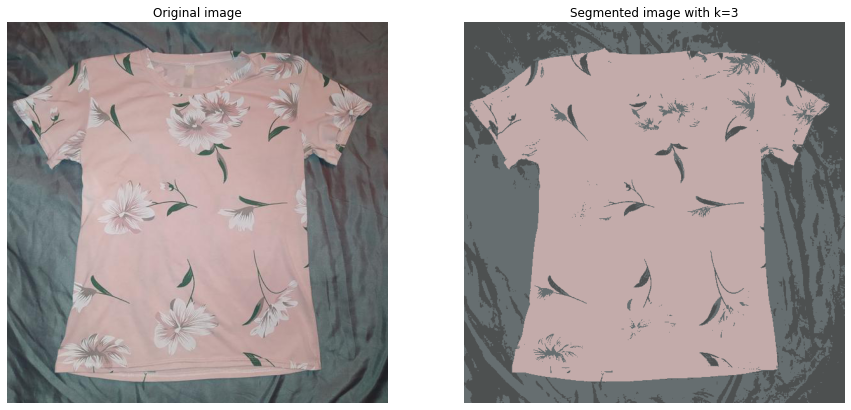

In [26]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

### Clustering for k=5

In [18]:
n_clusters = 5
kmeans = KMeans(n_clusters).fit(pixels)

c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,1,72.871594,73.250159,73.812603
1,58,52,54,1,72.871594,73.250159,73.812603
2,62,56,58,1,72.871594,73.250159,73.812603


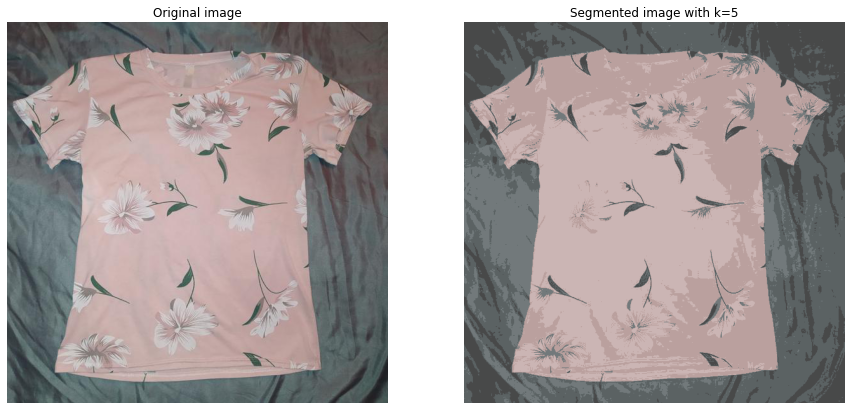

In [19]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

In [25]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [39]:
KMean= KMeans(n_clusters=5)
KMean.fit(pixels)

KMeans(n_clusters=5)

In [40]:
label=KMean.predict(pixels)

In [40]:
print(f'Silhouette Score(n=5): {silhouette_score(pixels, label)}')

Silhouette Score(n=5): 0.48114125717188144


In [24]:
print(f'Silhouette Score(n=3): {silhouette_score(pixels, label)}')

Silhouette Score(n=3): 0.6377921421726921


In [41]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, label)}')

calinski_harabasz_score: 2260112.9652019674


In [31]:
results2 = {}
for i in range(2,10):
    kmean = KMeans(n_clusters=i, random_state=30)
    labels2 = kmean.fit_predict(pixels)
    ch_index = metrics.calinski_harabasz_score(pixels, labels2)
    results2.update({i: ch_index})

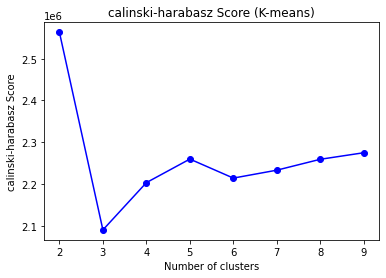

In [32]:
plt.plot(list(results2.keys()), list(results2.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("calinski-harabasz Score")
plt.title('calinski-harabasz Score (K-means)')
plt.show()

In [33]:
results2 = {}
for i in range(2,10):
    kmean = KMeans(n_clusters=i, random_state=30)
    labels2 = kmean.fit_predict(pixels)
    db_index = davies_bouldin_score(pixels, labels2)
    results2.update({i: db_index})

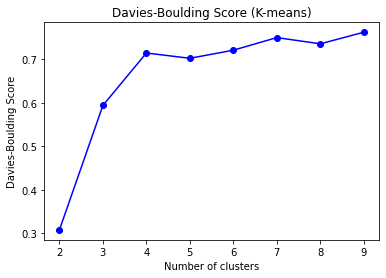

In [34]:
plt.plot(list(results2.keys()), list(results2.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Score")
plt.title('Davies-Boulding Score (K-means)')
plt.show()

In [38]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, label)}')

davies_bouldin_score: 0.5940286291897501


In [15]:
# a list of within-cluster sum of squares (WCSS) for each clustering solution
wcss =[]
k_range = range(2, 21)
for k in k_range:
    print(f'Processing k={k}')
    kmeans = KMeans(k)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)
    
wcss

Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20


[275895390.5607487,
 177644428.37338695,
 115716686.08236533,
 85803095.7664872,
 70590806.92761323,
 58627497.80298497,
 49877838.10400427,
 43473906.81360325,
 38662858.521363765,
 35474343.42558912,
 32516071.14123225,
 30193053.792613298,
 28160174.2975551,
 26191282.634768255,
 24914668.468608536,
 23619025.36198453,
 22202646.538635325,
 21089069.093164504,
 20013909.49398727]

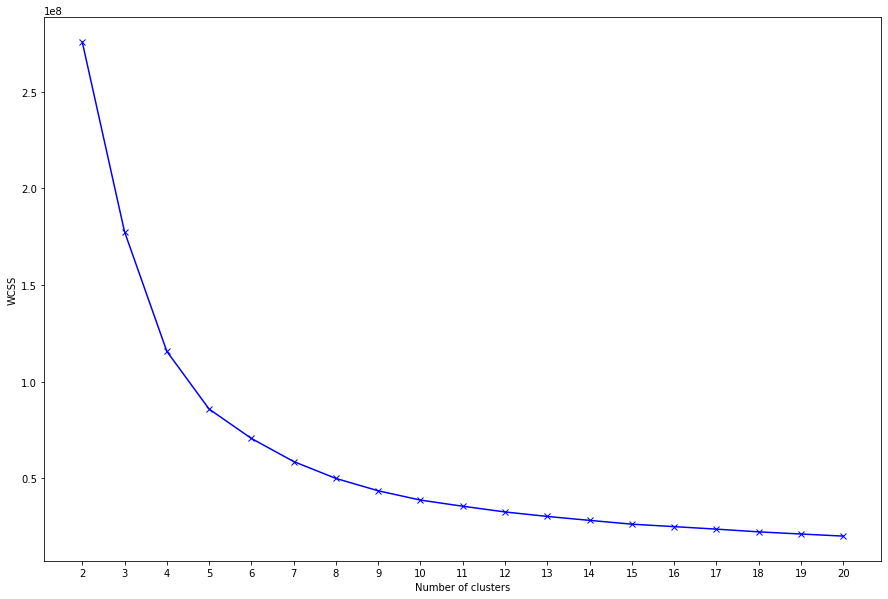

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(k_range, wcss, 'bx-')
ax.set_xticks(k_range)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

The plot demonstrates that k=5 is the optimum value

### Kmeans++

In [57]:
n_clusters = 5
kss = KMeans(n_clusters,init='k-means++').fit(pixels)

In [58]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kss.labels_ 

In [59]:
centers_map_R = {i:kss.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kss.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kss.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,4,72.853931,73.206278,73.772193
1,58,52,54,4,72.853931,73.206278,73.772193
2,62,56,58,4,72.853931,73.206278,73.772193


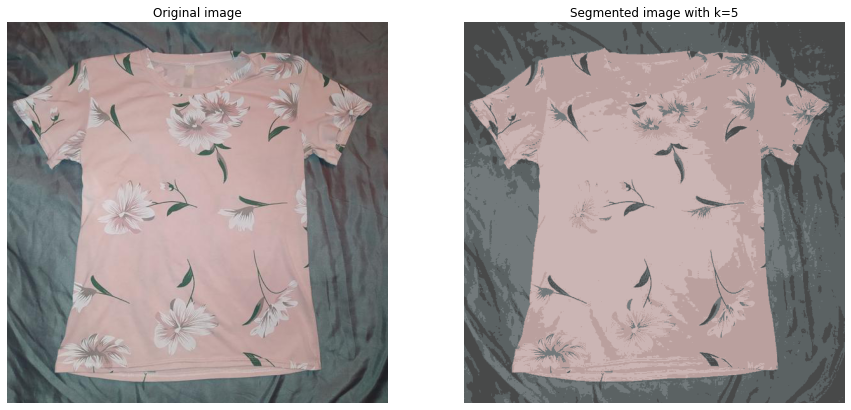

In [60]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

In [61]:
Kss= KMeans(n_clusters=5,init='k-means++')
Kss.fit(pixels)

KMeans(n_clusters=5)

In [65]:
label1=Kss.predict(pixels)

In [66]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, label1)}')

calinski_harabasz_score: 2259710.267545047


In [67]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, label1)}')

davies_bouldin_score: 0.7025746224477706


In [68]:
print(f'Silhouette Score(n=5): {silhouette_score(pixels, label1)}')

Silhouette Score(n=5): 0.4811257626720816
